## Testing transforms.py

This notebook demonstrating how to use augmentation, and the effects of different augmentation to let you get a sense and experiment if that augmentation methods is suitable for you specific dataset.

You can always visualize your augmentation with this notebook.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.plots import *
from fastai.dataset import *

In [3]:
PATH = "data/state/"

### Drivers with differen actions

In [4]:
def get_x(f,category):
    return open_image(f'{PATH}/valid/{category}/{f}')

In [5]:
files = os.listdir(f'{PATH}valid/c0')[:5]

In [6]:
f = files[1]
x = get_x(f,'c0')
# y = np.array(corner_labels[f], dtype=np.float32)
# y

## RandomScale

""" Scales an image so that the min size is a random number between [sz, sz*max_zoom]

    This transforms (optionally) scales x,y at with the same parameters.
    Arguments:
        sz: int
            target size
        max_zoom: float
            float >= 1.0
        p : float
            a probability for doing the random sizing
        tfm_y: TfmType
            type of y transform
"""

In [7]:
transforms = [RandomBlur(),RandomCrop(224),RandomDihedral(),RandomFlip(),
             RandomLighting(0.05, 0.05),RandomRotate(10),
            RandomScale(224,0.1),RandomStretch(0.1),RandomZoom(0.1)]

In [119]:
def plotX(x, augmentation_method, y=1, crop_method=None ):
    f = plt.figure(figsize=(8,6))
    plt.imshow(x)
    
    # Make 4 augmented images
    imgs = []
    for i in range(4):    
        xx,yy = augmentation_method(x,1) # Y is not needed, unless you are doing augmentation with pixels or coordinate.
        imgs.append(xx)  
            
    if crop_method:
        for i,img in enumerate(imgs):
            imgs[i],_ = crop_method(350)(img,1)
       
    # Plot the augmented/cropped images       
    fs = plt.figure(figsize=(8,6))       
    for i in range(len(imgs)):
        sp = fs.add_subplot(2, len(imgs)//2, i+1)
        plt.imshow(imgs[i])        
    return imgs

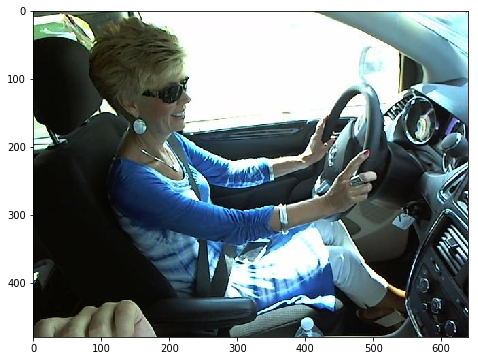

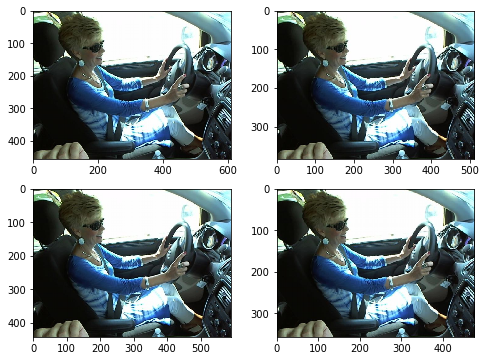

In [120]:
images = plotX(x,RandomScale(sz=350,max_zoom = 1.5, p=1)); # p=1 to force augmentation

Notice the x,y axis is changing. We usually will crop out the image using RandomCrop or Central Crop, be careful not to zoom too much as you may eventually crop out the subject. Please be aware that the croping is done by passing  a CropType parameter to tfms_from_model usually, you don't have to pass cropping as augmentation method, it is solely for demonstration purpose

In this dataset, Center Crop probably is a better choice, since the camera is in fixed position, a lower max_zoom ratio is more conservative choice as we have plently of augmentation choices.

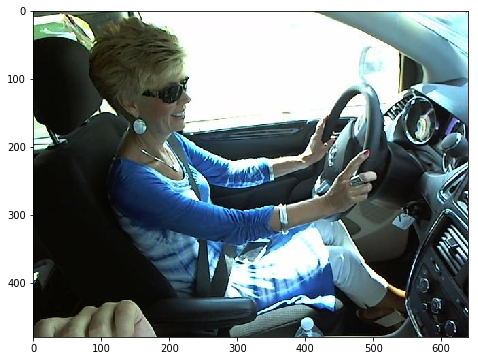

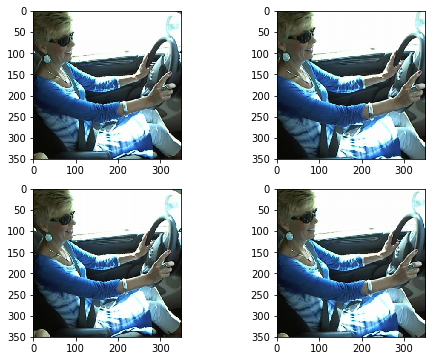

In [121]:
images = plotX(x,RandomScale(sz=350,max_zoom = 1.5, p=1),crop_method=CenterCrop); # p=1 to force augmentation

We are risking if we keep max_zoom = 1.5 and RandomCrop at the same time, as you see the driver face is totally cropped out.

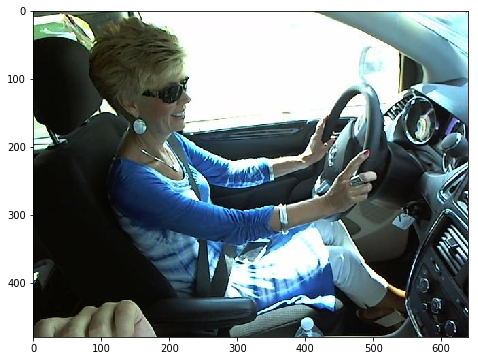

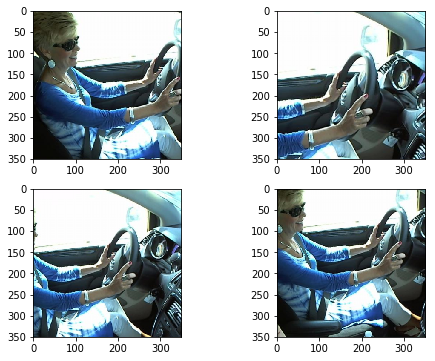

In [116]:
images = plotX(x,RandomScale(sz=350,max_zoom = 1.5, p=1),crop_method=RandomCrop);

# Random Stretch

'''stretches image x horizontally by sr+1, and vertically by sc+1 while retaining the origal image size and proportion.'''


Becareful that RandomStrect require a paramater that actually stretch the dimension by 1+parameter , I think this is a bit inconsistent with max_zoom which start from 0.

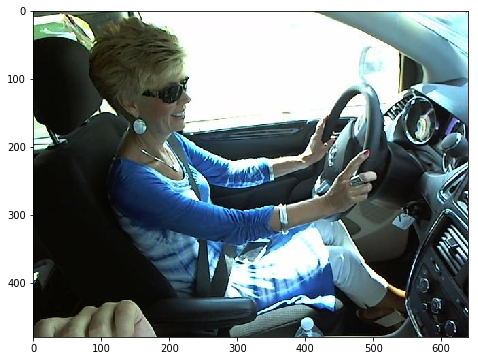

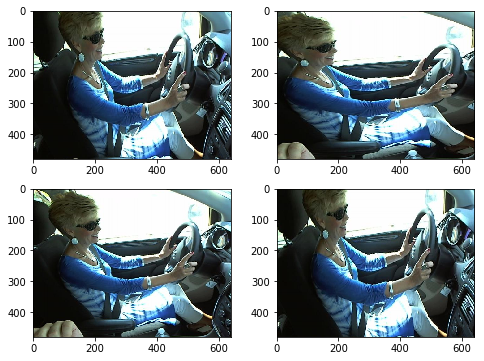

In [143]:
plotX(x,augmentation_method=RandomStretch(0.5)); # No Cropping to demonstrate the effect more obviously

## Random Dihedral

Random Dihedral do 90/180/270/360 degree rotation only. For a fixed camera, Random Dihedral is probably not realistic, a moderate rotation make more sense

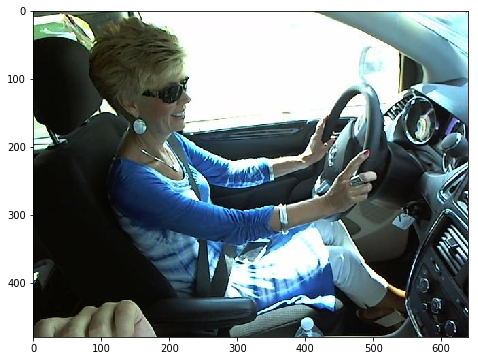

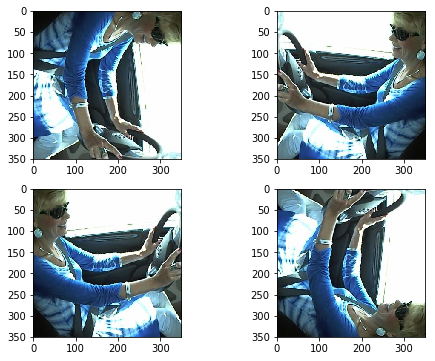

In [124]:
plotX(x,augmentation_method=RandomDihedral(),crop_method=CenterCrop);

# RandomRotate

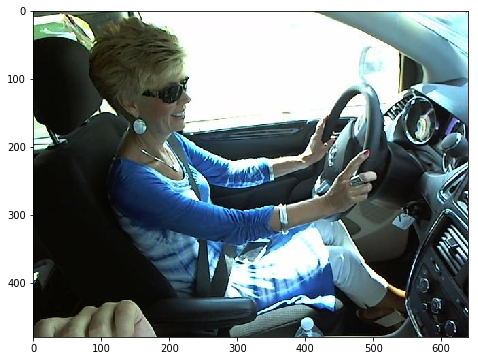

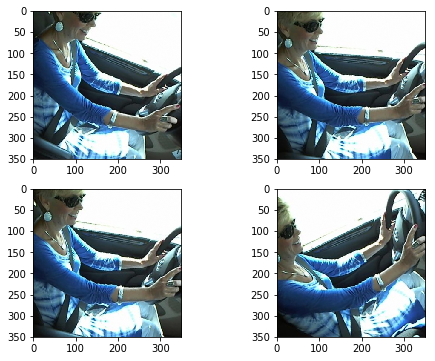

In [128]:
plotX(x,augmentation_method=RandomRotate(30,p=1),crop_method=CenterCrop);

# Random Rotate Zoom

RandomRotateZoom is a combination of augmentation (Rotate, Zoom, Stretch), you need to pass a list of probablities (must sum to 1), each augmentation can happens independently, except when "No Transformation" is activated, which will overwrite all transformation

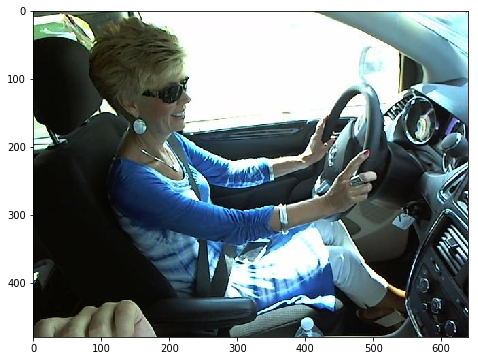

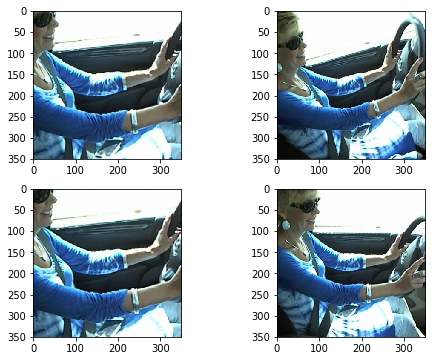

In [167]:
plotX(x,augmentation_method=RandomRotateZoom(15,1.1,0.05,ps=[0.3,0.3,0.4,0]),crop_method=CenterCrop);

## RandomFlip

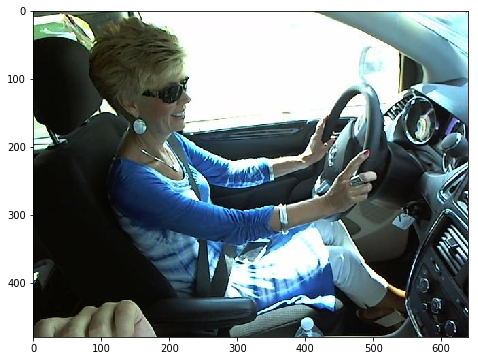

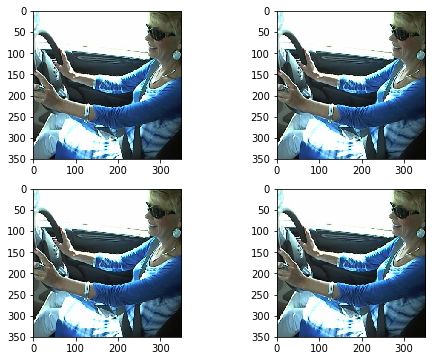

In [148]:
plotX(x,augmentation_method=RandomFlip(p=1),crop_method=CenterCrop);

## RandomLighting

This one is particularly useful as these kind of lighting constrast is realistic and challenging for a model. First parameter is balance and second parameter is constrast.

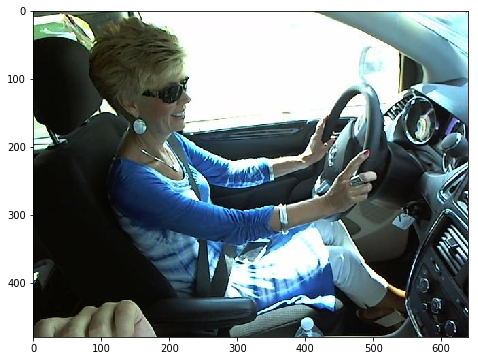

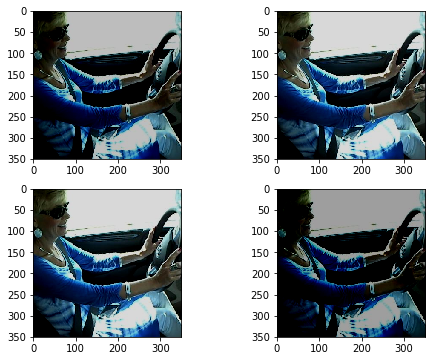

In [155]:
plotX(x,augmentation_method=RandomLighting(0.5,0),crop_method=CenterCrop);

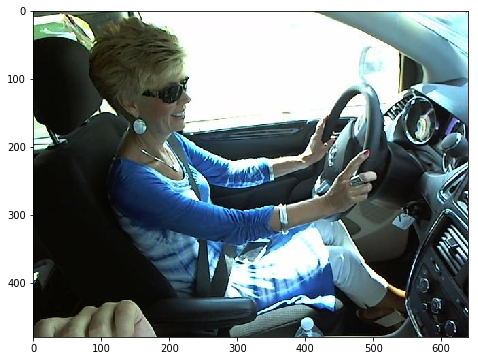

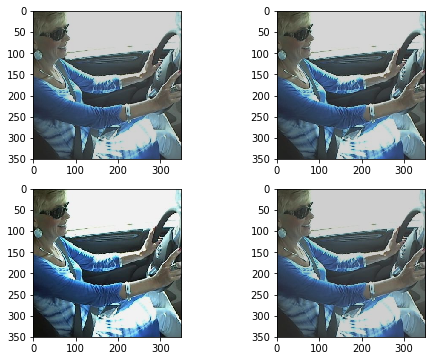

In [156]:
plotX(x,augmentation_method=RandomLighting(0,0.5),crop_method=CenterCrop);

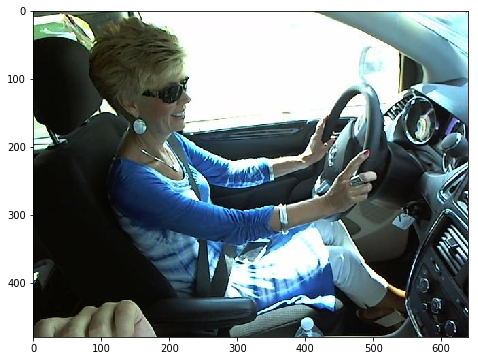

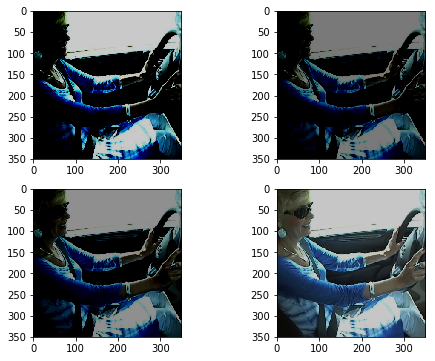

In [157]:
plotX(x,augmentation_method=RandomLighting(0.5,0.5),crop_method=CenterCrop);

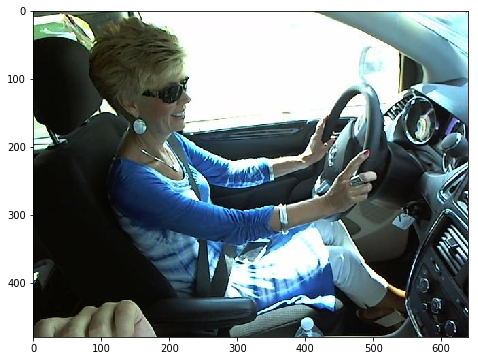

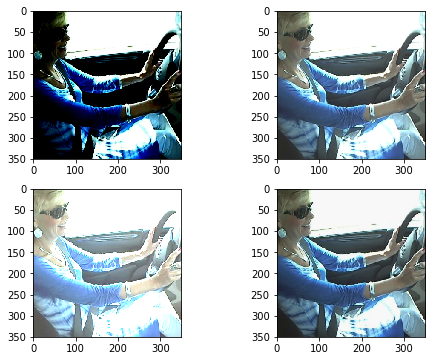

In [180]:
plotX(x,augmentation_method=RandomLighting(0.5,0.6),crop_method=CenterCrop);